# *Comparative Analysis of Machine Learning Models for Diagnosis Prediction*

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
df.duplicated().sum()

0

In [34]:
df.drop(columns = ['id','Unnamed: 32'], inplace = True)
df['diagnosis'] = df['diagnosis'].map({ 'M' : 0, 'B' : 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
correlation_matrix = df.corr()
correlation_with_diagnosis = correlation_matrix['diagnosis']
correlation_with_diagnosis.sort_values()

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se                 0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

diagnosis
1    357
0    212
Name: count, dtype: int64

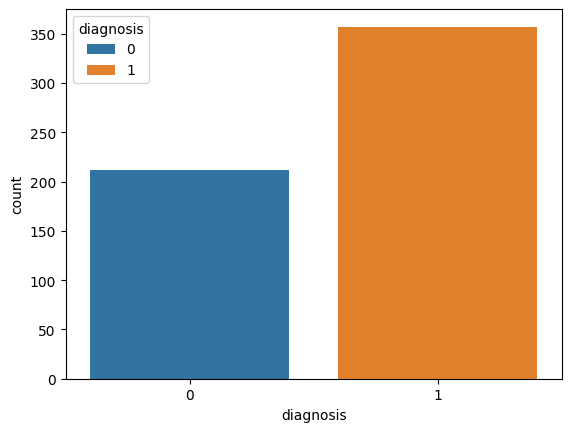

In [38]:
sns.countplot(x='diagnosis',hue='diagnosis',data = df)
df['diagnosis'].value_counts()

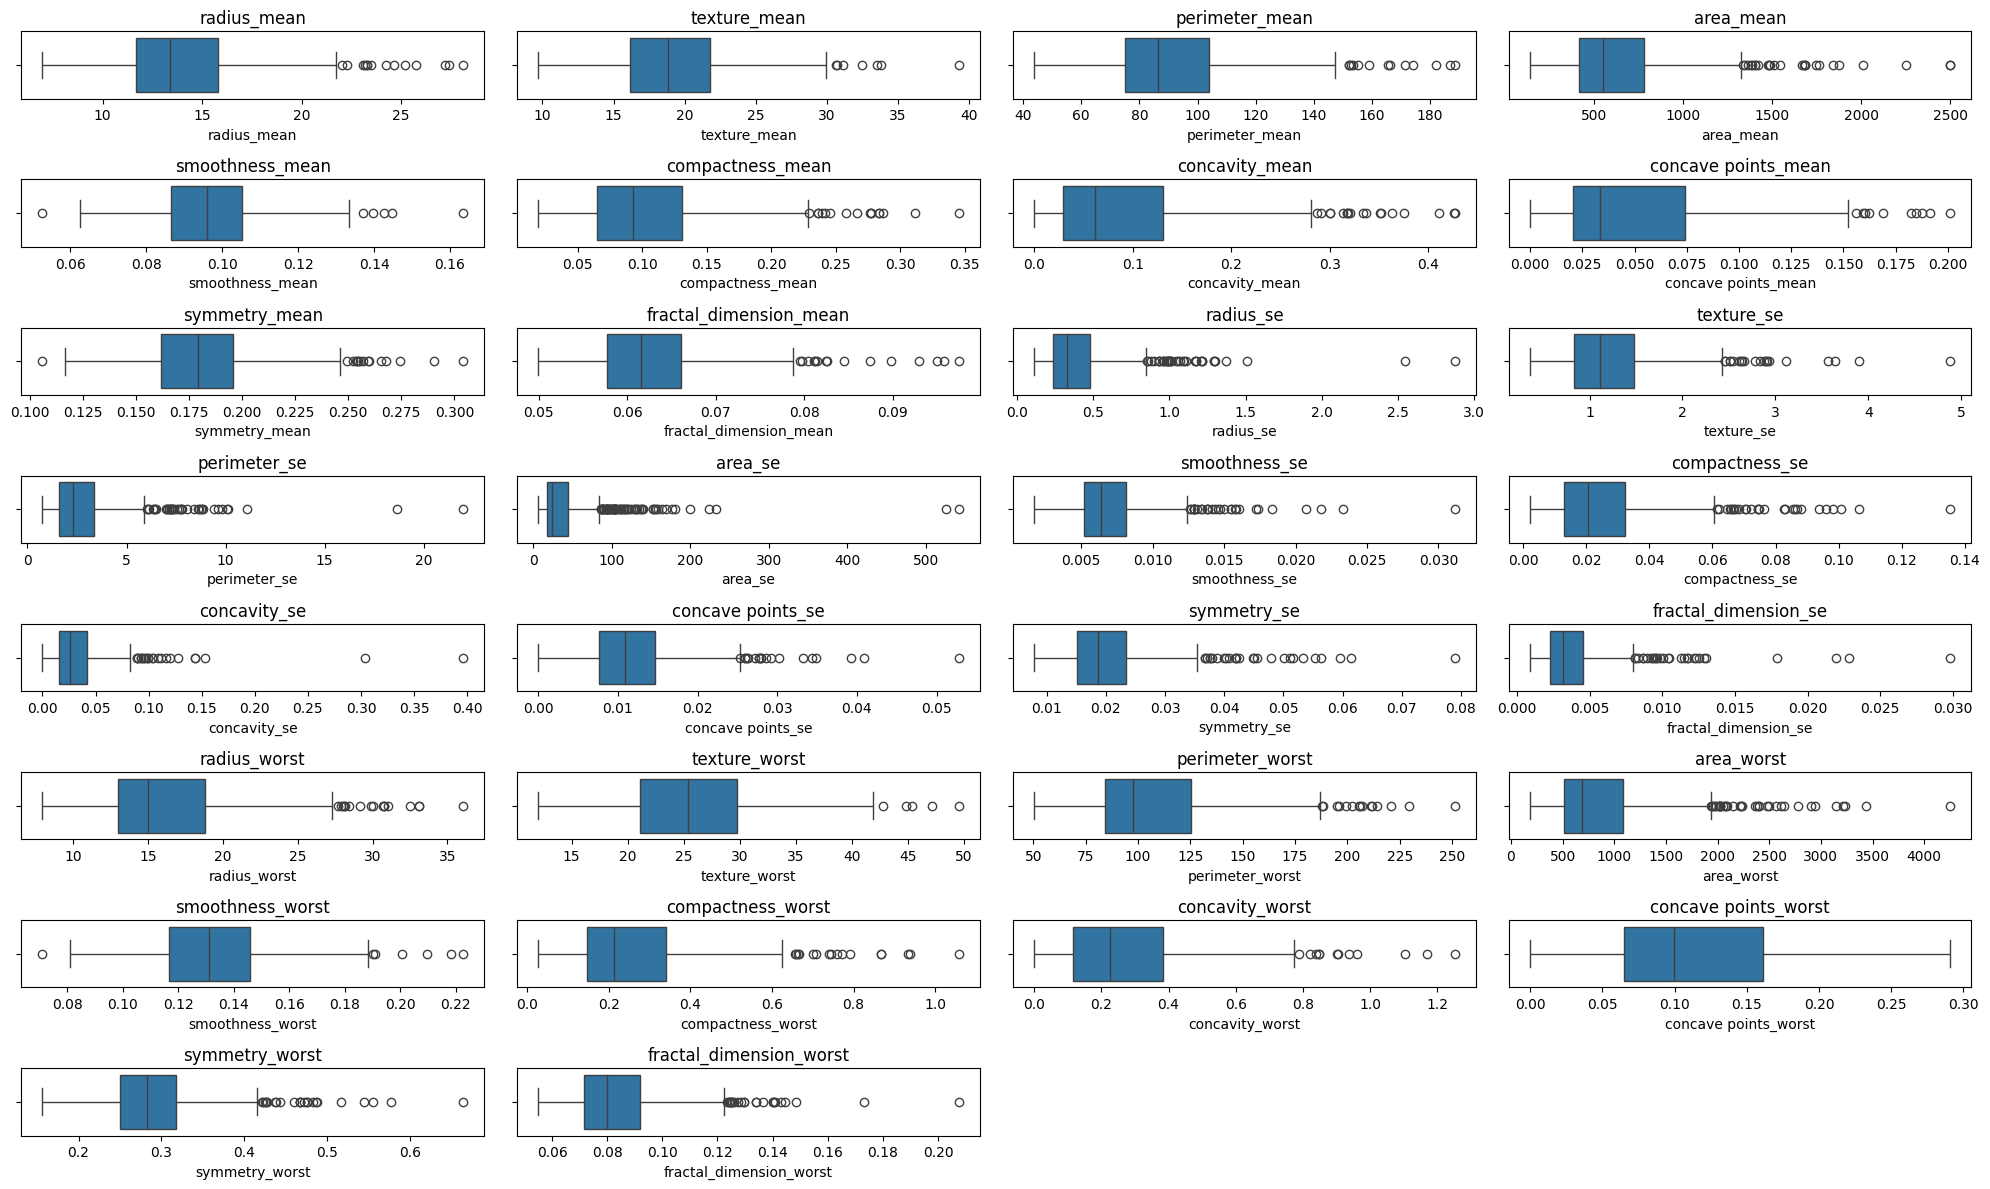

In [39]:

numerical_cols = df.columns[1:] 
n_cols = 4 
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols != 0 else 0)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i]) 
    axes[i].set_title(col) 

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



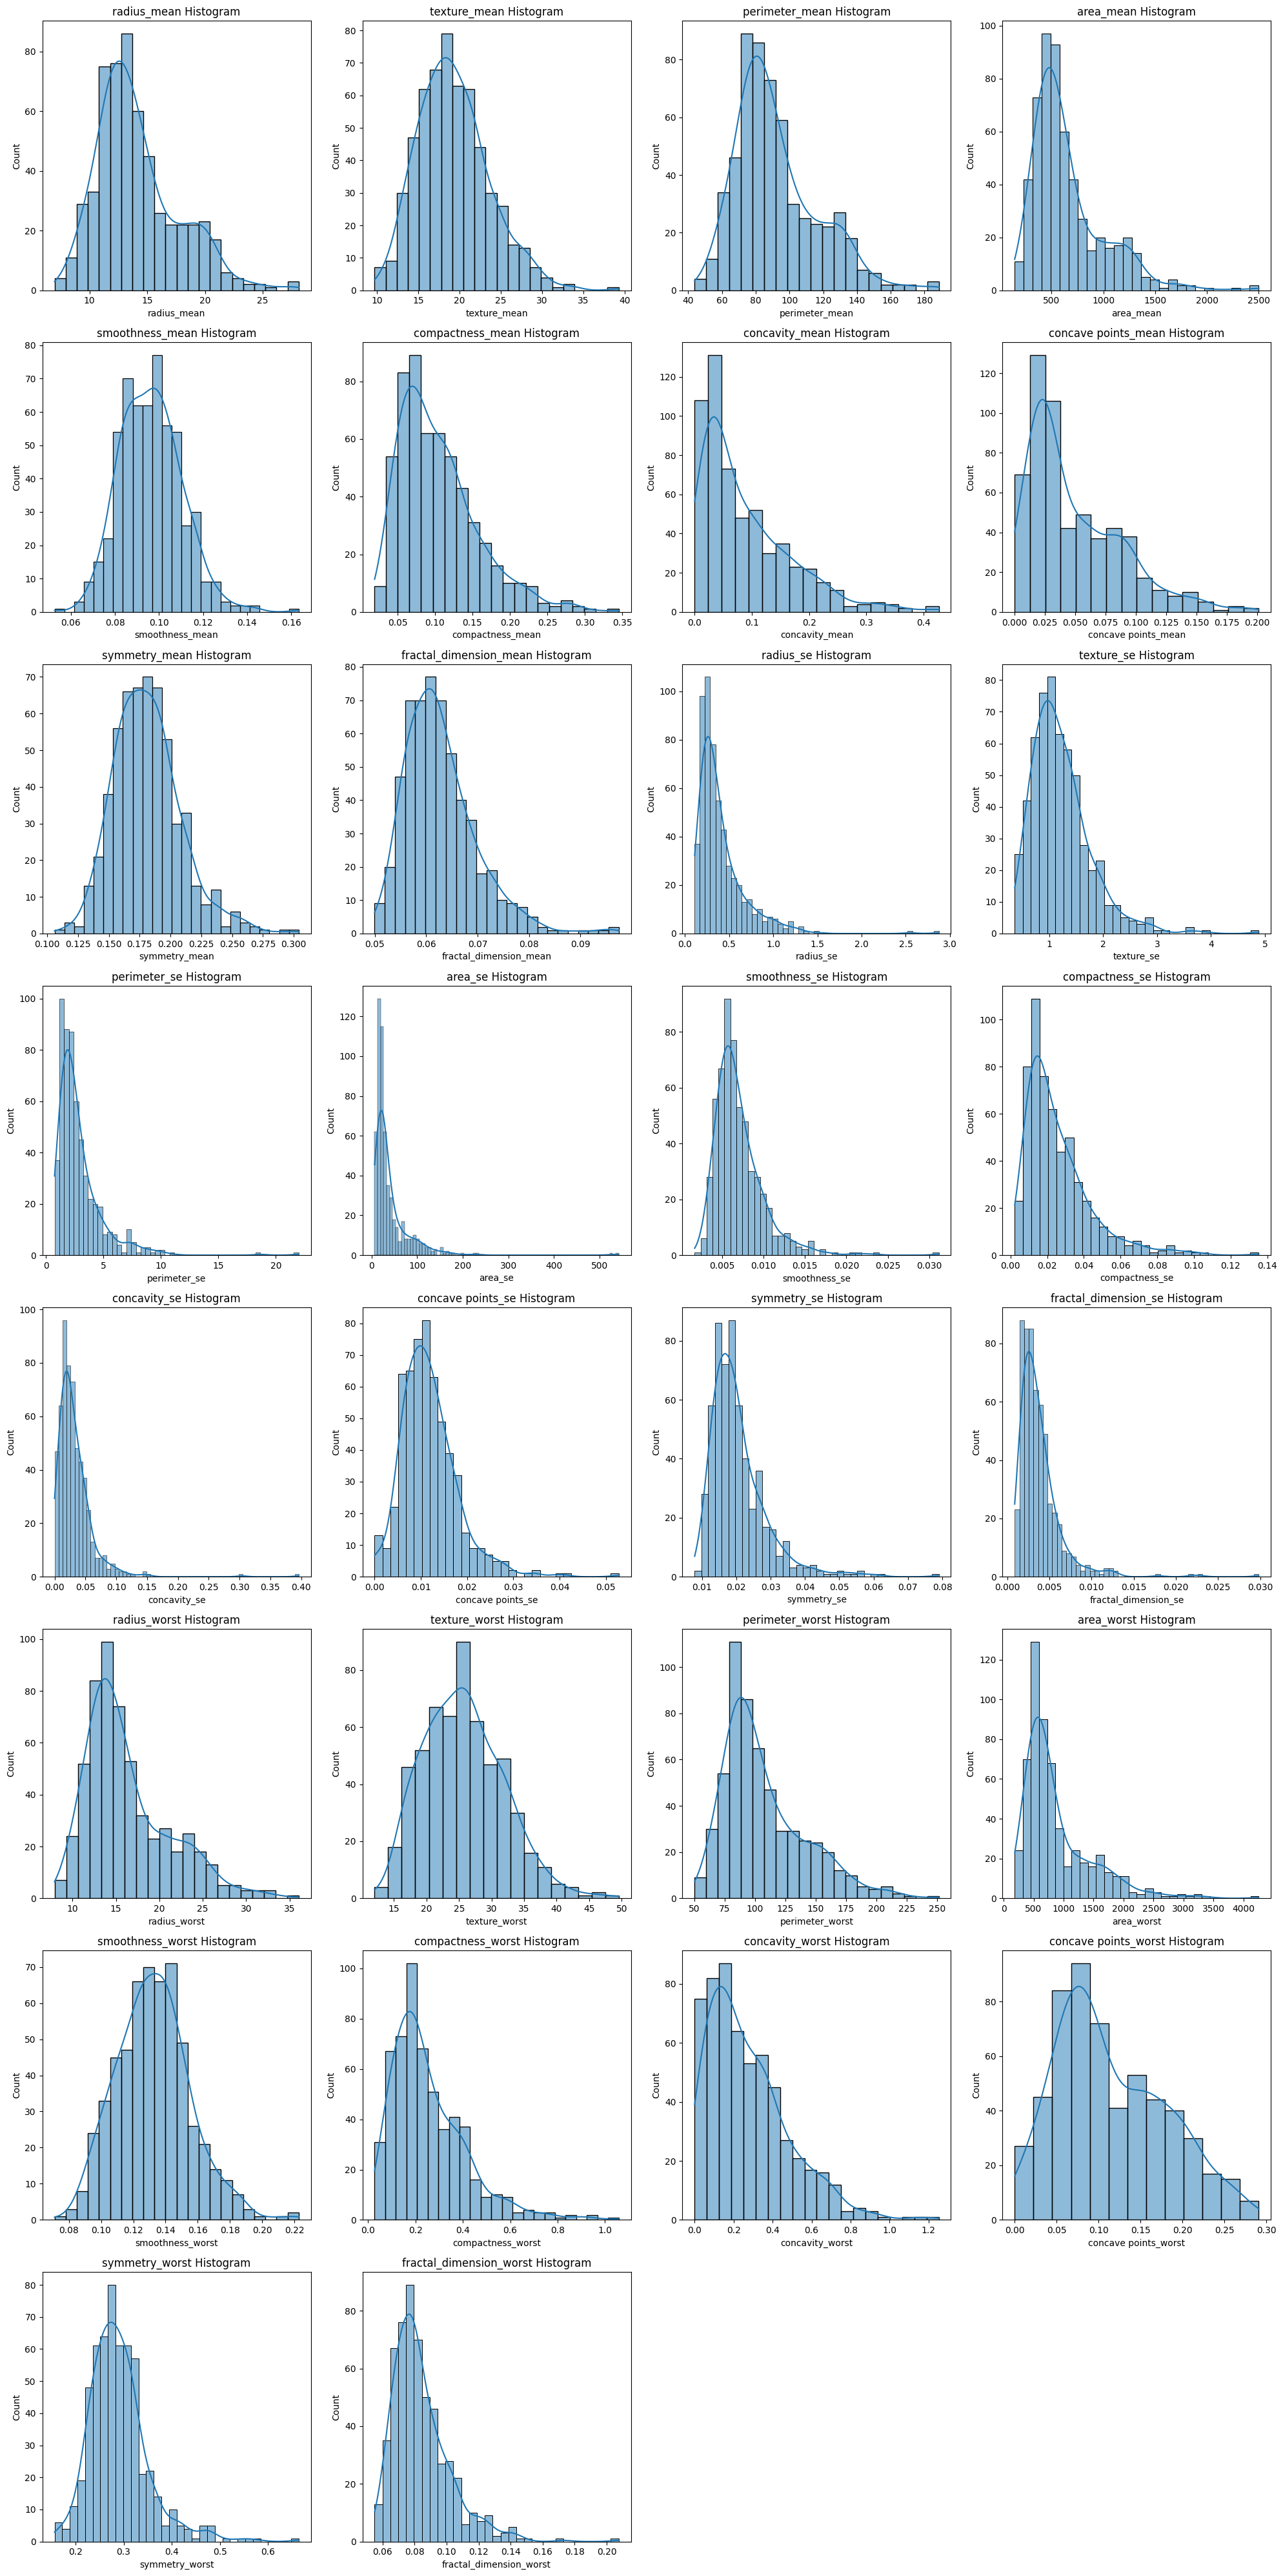

In [52]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Histogram')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


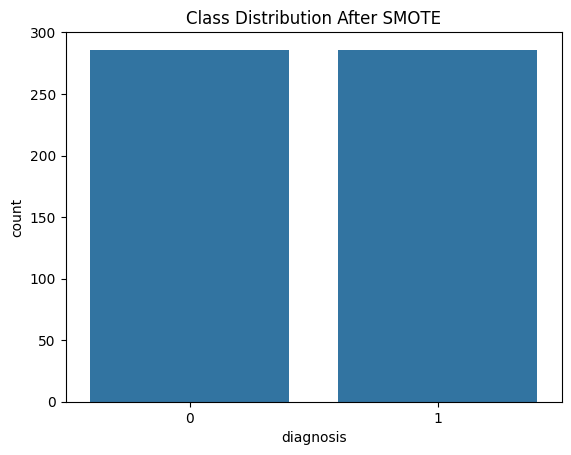

In [110]:
X_train_smote_df = pd.DataFrame(X_train, columns=X.columns)  
y_train_smote_df = pd.DataFrame(y_train, columns=['diagnosis'])
df_train_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)


sns.countplot(x='diagnosis', data=df_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

In [111]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
models = [LogisticRegression(random_state=42),KNeighborsClassifier(),
          SVC(probability=True, random_state=42),GaussianNB(),
          DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42)]
model_names = ['LogisticRegression','KNN','SVM','NaiveBayes','DecisionTree','RandomForest']
auc_scores = []

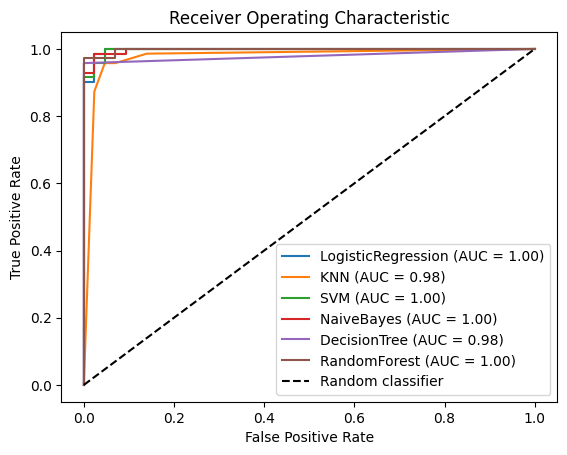

In [113]:
for model,name in zip(models,model_names): 
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = auc(fpr,tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))
    
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [114]:
from sklearn.metrics import classification_report

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print('-' * 50) 

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------------------------------------
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97 

In [115]:
from sklearn.model_selection import GridSearchCV
LogReg = LogisticRegression(max_iter=10000)

penalty = ['l1','l2','elasticnet']
solver = [ 'newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
C = [0.001, 0.01, 0.1, 1, 10, 100]
params = {'C' : C ,'penalty' : penalty , 'solver' : solver }

LogReg_grid = GridSearchCV(estimator = LogReg,param_grid = params ,refit= True,verbose =0,n_jobs=-1)
LogReg_grid.fit(X_train,y_train.ravel())
print(f"best parameters : {LogReg_grid.best_params_}")
print(f"best score : {LogReg_grid.best_score_}")


best parameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
best score : 0.9790389016018306


In [116]:
LogReg = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')
LogReg.fit(X_train,y_train.ravel())
y_pred = LogReg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



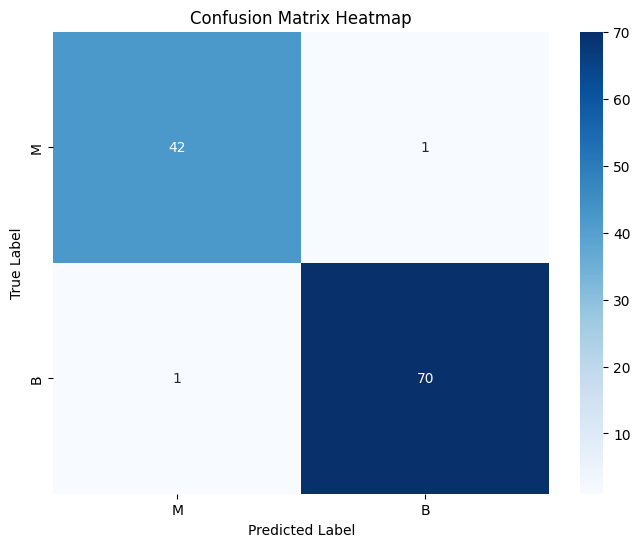

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'B'], yticklabels=['M', 'B'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()